In [1]:
import glob
import pickle
import numpy as np
from music21 import converter, instrument, note, chord, stream
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils import multi_gpu_model
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [5]:
""" This module prepares midi file data and feeds it to the neural
    network for training.
    Code from https://github.com/Skuldur/Classical-Piano-Composer/ """

WEIGHTS_FOLDER = 'weights/'
EPOCHS = 200
BATCH_SIZE = 2048
SEQUENCE_LENGTH = 125
GPUs = 4

def prepare_sequences(notes, n_vocab, sequence_length):
    """ Prepare the sequences used by the Neural Network """

    # get all pitch names
    pitchnames = sorted(set(item for item in notes))

     # create a dictionary to map pitches to integers
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    network_input = []
    network_output = []

    # create input sequences and the corresponding outputs
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        network_output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)

    # reshape the input into a format compatible with LSTM layers
    normalized_input = np.reshape(network_input, (n_patterns, sequence_length, 1))
    # normalize input
    normalized_input = normalized_input / float(n_vocab)

    network_output = np_utils.to_categorical(network_output)

    return network_input, normalized_input, network_output

def create_network(network_input, n_vocab):
    """ create the structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        512,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(512))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    
    return model

def train(model, network_input, network_output, sequence_length):
    """ train the neural network """
    filepath = 'weights' + str(sequence_length) + "/weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"
    checkpoint = ModelCheckpoint(
        filepath,
        monitor='loss',
        verbose=0,
        save_best_only=True, 
        mode='min'
    )
    callbacks_list = [checkpoint]

    return model.fit(network_input, network_output, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks_list)

Epoch 1/200
53054/53054 [==============================] - 146s 3ms/step - loss: 4.8683
Epoch 2/200
53054/53054 [==============================] - 128s 2ms/step - loss: 4.6160
Epoch 3/200
53054/53054 [==============================] - 127s 2ms/step - loss: 4.5954
Epoch 4/200
53054/53054 [==============================] - 127s 2ms/step - loss: 4.5837
Epoch 5/200
53054/53054 [==============================] - 126s 2ms/step - loss: 4.8572
Epoch 6/200
53054/53054 [==============================] - 127s 2ms/step - loss: 4.5932
Epoch 7/200
53054/53054 [==============================] - 126s 2ms/step - loss: 4.5955
Epoch 8/200
53054/53054 [==============================] - 126s 2ms/step - loss: 4.5666
Epoch 9/200
53054/53054 [==============================] - 126s 2ms/step - loss: 4.5632
Epoch 10/200
53054/53054 [==============================] - 126s 2ms/step - loss: 4.5631
Epoch 11/200
53054/53054 [==============================] - 126s 2ms/step - loss: 4.5604
Epoch 12/200
53054/53054 [====

53054/53054 [==============================] - 125s 2ms/step - loss: 4.1916
Epoch 94/200
53054/53054 [==============================] - 124s 2ms/step - loss: 4.1799
Epoch 95/200
53054/53054 [==============================] - 125s 2ms/step - loss: 4.1669
Epoch 96/200
53054/53054 [==============================] - 125s 2ms/step - loss: 4.1486
Epoch 97/200
53054/53054 [==============================] - 124s 2ms/step - loss: 4.1257
Epoch 98/200
53054/53054 [==============================] - 125s 2ms/step - loss: 4.1150
Epoch 99/200
53054/53054 [==============================] - 125s 2ms/step - loss: 4.0891
Epoch 100/200
53054/53054 [==============================] - 124s 2ms/step - loss: 4.0642
Epoch 101/200
53054/53054 [==============================] - 125s 2ms/step - loss: 4.0474
Epoch 102/200
53054/53054 [==============================] - 124s 2ms/step - loss: 4.0257
Epoch 103/200
53054/53054 [==============================] - 125s 2ms/step - loss: 4.0121
Epoch 104/200
53054/53054 [===

53054/53054 [==============================] - 125s 2ms/step - loss: 1.0425
Epoch 185/200
53054/53054 [==============================] - 125s 2ms/step - loss: 1.0500
Epoch 186/200
53054/53054 [==============================] - 125s 2ms/step - loss: 1.0007
Epoch 187/200
53054/53054 [==============================] - 126s 2ms/step - loss: 0.9860
Epoch 188/200
53054/53054 [==============================] - 125s 2ms/step - loss: 0.9615
Epoch 189/200
53054/53054 [==============================] - 125s 2ms/step - loss: 0.9501
Epoch 190/200
53054/53054 [==============================] - 125s 2ms/step - loss: 0.9095
Epoch 191/200
53054/53054 [==============================] - 125s 2ms/step - loss: 0.8848
Epoch 192/200
53054/53054 [==============================] - 125s 2ms/step - loss: 0.8776
Epoch 193/200
53054/53054 [==============================] - 125s 2ms/step - loss: 0.8355
Epoch 194/200
53054/53054 [==============================] - 125s 2ms/step - loss: 0.8323
Epoch 195/200
53054/5305

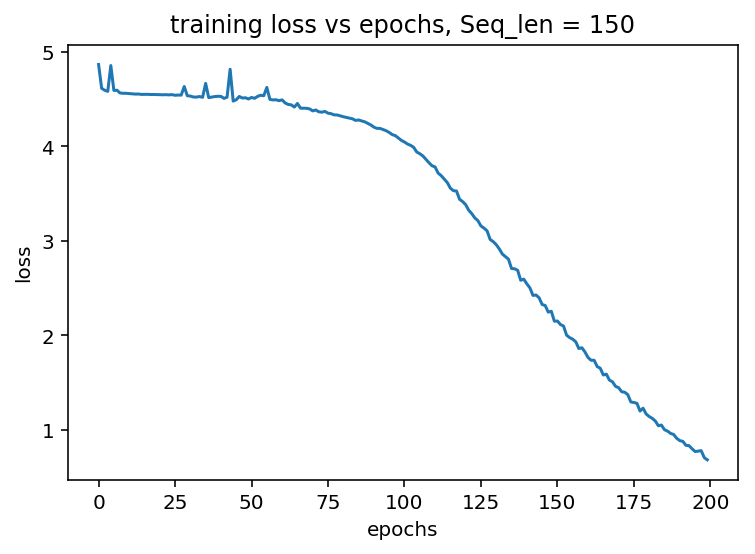

Epoch 1/200
53079/53079 [==============================] - 117s 2ms/step - loss: 4.9025
Epoch 2/200
53079/53079 [==============================] - 102s 2ms/step - loss: 4.6185
Epoch 3/200
53079/53079 [==============================] - 101s 2ms/step - loss: 4.5954
Epoch 4/200
53079/53079 [==============================] - 102s 2ms/step - loss: 4.5841
Epoch 5/200
53079/53079 [==============================] - 102s 2ms/step - loss: 4.5739
Epoch 6/200
53079/53079 [==============================] - 101s 2ms/step - loss: 4.5867
Epoch 7/200
53079/53079 [==============================] - 102s 2ms/step - loss: 4.5645
Epoch 8/200
53079/53079 [==============================] - 102s 2ms/step - loss: 4.5632
Epoch 9/200
53079/53079 [==============================] - 101s 2ms/step - loss: 4.5612
Epoch 10/200
53079/53079 [==============================] - 102s 2ms/step - loss: 4.5571
Epoch 11/200
53079/53079 [==============================] - 102s 2ms/step - loss: 4.5543
Epoch 12/200
53079/53079 [====

53079/53079 [==============================] - 102s 2ms/step - loss: 1.0867
Epoch 94/200
53079/53079 [==============================] - 103s 2ms/step - loss: 1.0472
Epoch 95/200
53079/53079 [==============================] - 102s 2ms/step - loss: 1.0091
Epoch 96/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.9780
Epoch 97/200
53079/53079 [==============================] - 103s 2ms/step - loss: 0.9459
Epoch 98/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.9176
Epoch 99/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.8935
Epoch 100/200
53079/53079 [==============================] - 103s 2ms/step - loss: 0.8479
Epoch 101/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.8163
Epoch 102/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.8095
Epoch 103/200
53079/53079 [==============================] - 103s 2ms/step - loss: 0.7705
Epoch 104/200
53079/53079 [===

53079/53079 [==============================] - 102s 2ms/step - loss: 0.0948
Epoch 185/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.0914
Epoch 186/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.1120
Epoch 187/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.0852
Epoch 188/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.1189
Epoch 189/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.0830
Epoch 190/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.0903
Epoch 191/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.1255
Epoch 192/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.0708
Epoch 193/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.1126
Epoch 194/200
53079/53079 [==============================] - 102s 2ms/step - loss: 0.0747
Epoch 195/200
53079/5307

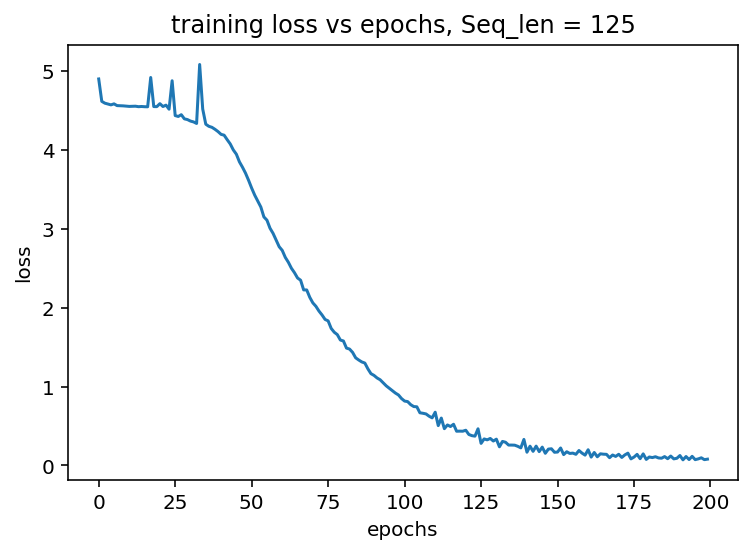

Epoch 1/200
53104/53104 [==============================] - 99s 2ms/step - loss: 4.8715
Epoch 2/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.6179
Epoch 3/200
53104/53104 [==============================] - 83s 2ms/step - loss: 4.5948
Epoch 4/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.5859
Epoch 5/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.5731
Epoch 6/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.5669
Epoch 7/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.5810
Epoch 8/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.5542
Epoch 9/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.6674
Epoch 10/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.5423
Epoch 11/200
53104/53104 [==============================] - 82s 2ms/step - loss: 4.5433
Epoch 12/200
53104/53104 [===============

53104/53104 [==============================] - 87s 2ms/step - loss: 3.6533
Epoch 95/200
53104/53104 [==============================] - 87s 2ms/step - loss: 3.5933
Epoch 96/200
53104/53104 [==============================] - 87s 2ms/step - loss: 3.5148
Epoch 97/200
53104/53104 [==============================] - 87s 2ms/step - loss: 3.4575
Epoch 98/200
53104/53104 [==============================] - 87s 2ms/step - loss: 3.4030
Epoch 99/200
53104/53104 [==============================] - 87s 2ms/step - loss: 3.3424
Epoch 100/200
53104/53104 [==============================] - 87s 2ms/step - loss: 3.2628
Epoch 101/200
53104/53104 [==============================] - 86s 2ms/step - loss: 3.1778
Epoch 102/200
53104/53104 [==============================] - 86s 2ms/step - loss: 3.1434
Epoch 103/200
53104/53104 [==============================] - 87s 2ms/step - loss: 3.0711
Epoch 104/200
53104/53104 [==============================] - 87s 2ms/step - loss: 2.9917
Epoch 105/200
53104/53104 [=============

53104/53104 [==============================] - 83s 2ms/step - loss: 0.4140
Epoch 187/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3712
Epoch 188/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3830
Epoch 189/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3568
Epoch 190/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3500
Epoch 191/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3723
Epoch 192/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3445
Epoch 193/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3846
Epoch 194/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.2617
Epoch 195/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3317
Epoch 196/200
53104/53104 [==============================] - 83s 2ms/step - loss: 0.3053
Epoch 197/200
53104/53104 [========

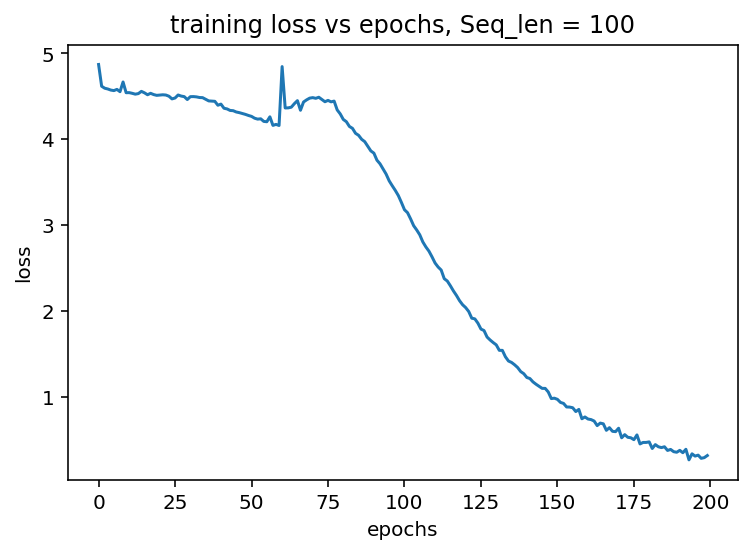

In [6]:
LENGTHS = [150, 125, 100]

def make_figure(X, graph_title, x_label, y_label, picture_name):
    fig = plt.figure()
    plt.plot(X)
    plt.title(graph_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    fig.savefig(picture_name + '.png', dpi=100)
    plt.show()

#PREPARE INPUT AND CREATE MODEL
with open('data/notes', 'rb') as filepath:
    notes = pickle.load(filepath)
        
# get amount of pitch names
n_vocab = len(set(notes))

# get all pitch names
pitchnames = sorted(set(item for item in notes))

for seq_len in LENGTHS:
    network_input, normalized_input, network_output = prepare_sequences(notes, n_vocab, seq_len)

    model = create_network(normalized_input, n_vocab)
    parallel_model = multi_gpu_model(model, gpus=GPUs)
    parallel_model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    
    history = train(parallel_model, normalized_input, network_output, seq_len)

    print(history.history)
    loss = history.history['loss']
    make_figure(loss, 'training loss vs epochs, Seq_len = ' + str(seq_len), 
                    'epochs', 'loss', 'loss' + str(seq_len))